# REGRESI LINIEAR
# Kelompok :
# Aristiawan Wiguna (51415023)
# Daryl Diningrat (51415600)
# Rama Nevta Hendra (55415621)
# Dhihar Eka Nur Falah (51415817)
# Dinuryah (51415967)

In [5]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

#this allows plots to appear directly in the notebook
%matplotlib inline

# Pandas
pandas adalah librari analisis data yang memiliki struktur data yang kita perlukan untuk membersihkan data mentah ke dalam sebuah bentuk yang cocok untuk analisis (yaitu tabel). 
Struktur data dasar pandas dinamakan DataFrame, yaitu sebuah koleksi kolom berurutan dengan nama dan jenis, dengan demikian merupakan sebuah tabel yang tampak seperti database dimana sebuah baris tunggal mewakili sebuah contoh tunggal dan kolom mewakili atribut tertentu. 

# Matplotib
Matplotlib adalah library Python 2D yang dapat menghasilkan plot dengan kualitas tinggi dalam berbagai format dan dapat digunakan di banyak platform.
Matplotlib dapat digunakan sebagai pembuat grafik dalam berbagai platform, seperti Python dan Jupyter. Grafik yang dapat dibuat beragam, seperti grafik garis, batang, lingkaran, histogram, dsb.

In [6]:
#read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col =0)
data.head()

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

# Membaca data

Membuat variable dengan nama Data. pd.read_csv untuk membaca data berekstensi csv dari library pd (pandas),
data.head() Untuk menampilkan data DataFrame paling atas berdasarkan index-nya menggunakan fungsi

In [7]:
#print the shape of the DataFrame
data.shape

(200, 4)

data.shape untuk menampilkan bentuk dari dataframe berupa baris dan kolom, dan dataframe yang kita gunakan terdapat 200 baris dan 4 kolom (TV, Newspaper, Radio, dan Sales)

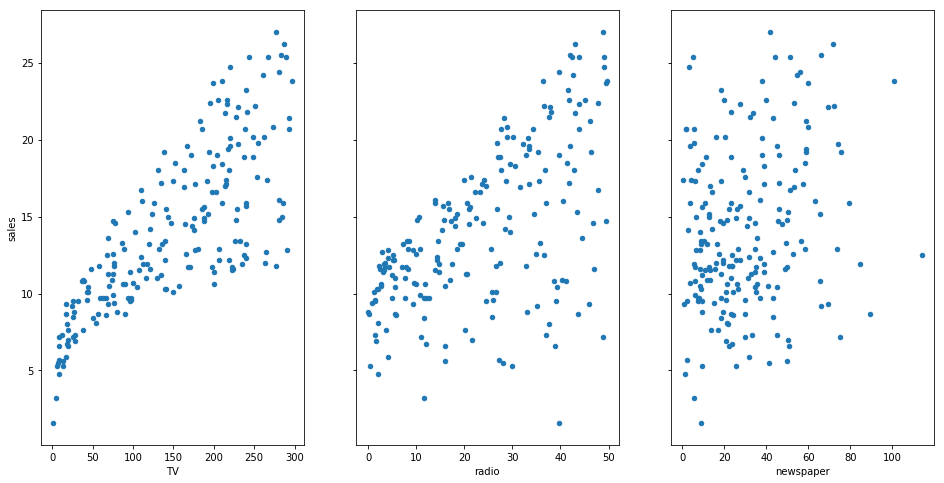

In [32]:
fig, axs = plt.subplots(1, 3, sharey = True)
data.plot(kind='scatter', x='TV', y ='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y ='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y ='sales', ax=axs[2])

# Plotting

- fig, axs sebagai variable
plt.subplots(1,3, Sharey = True) maksudnya adalah untuk memanggil library plt (matplotlib) dengan model sublots dan membuat 3 figure/grafik lalu sharey = True sebagai membagi sumbu y kepada figure/grafik yang lain

- data.plot(kind='scatter', x='TV', y ='sales', ax=axs[0], figsize=(16, 8)) menampilkan figure dengan sumbu x = TV dan sumbu y = sales dengan model plot scatter di index [0]
- data.plot(kind='scatter', x='radio', y ='sales', ax=axs[1]) menampilkan figure dengan sumbu x = radio dan sumbu y = sales dengan model plot scatter di index [1]
- data.plot(kind='scatter', x='newspaper', y ='sales', ax=axs[2]) menampilkan figure dengan sumbu x = newspaper dan sumbu y = sales dengan model plot scatter di index [2]

In [9]:
# this is standard import if you're using "formula notation" (similiar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='sales~TV', data=data).fit()

#print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

- import statsmodels.formula.api as smf untuk mengambil fungsi rumus
- lm = smf.ols(formula='sales~TV', data=data).fit() memberikan nilai pada variable menggunakan fungsi ols dari library statsmodels (smf) dengan formula berbandingan sales dengan TV 
- untuk print koefisien

In [20]:
#manually calculate the prediction
7.032594+0.047537*50

9.409444

melakukan perhitungan manual untuk prediksi

In [21]:
#you have to create a DataFrame since Statsmodels formula interface excepts it
X_new = pd.DataFrame({'TV':[50]})
X_new.head()

TV
0  50

variable x_new menggunakan model Dataframe pada pandas(pd) di Kolom TV dengan index 50. x_new.head() menampilkan data x_new dari paling atas 

In [22]:
#use the model to make predictions on a new value
lm.predict(X_new)

0    9.409426
dtype: float64

prediksi menggunakan model lm dengan nilai x_new

In [23]:
#print the R-squared value for the model
lm.rsquared

0.611875050850071

# R Squared Predicted
Salah satu tujuan untuk meregresikan variabel independen dengan variabel dependen adalah membuat rumus dan menggunakannya untuk melakukan prediksi dengan nilai nilai tertentu dari variabel independennya.

- lm.rsquared menampilkan nilai rsquared dengan model

In [24]:
#create DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV':[data.TV.min(), data.TV.max()]})
X_new.head()

TV
0    0.7
1  296.4

- X_new = pd.DataFrame({'TV':[data.TV.min(), data.TV.max()]}) # memasukan model dataframe pada x_new dari kolom TV dan mengambilkan data TV minimal dan data TV maksimal
- x_new.head() untuk menampilkan data tertinggi dari hasil minimal dan maksimal TV

In [25]:
# make predictions for those x values  and store them 
preds = lm.predict(X_new)
preds

0     7.065869
1    21.122454
dtype: float64

- membuat variable prediksi menggunakan model lm.predict dengan x_new
- preds menampilkan hasil prediksi

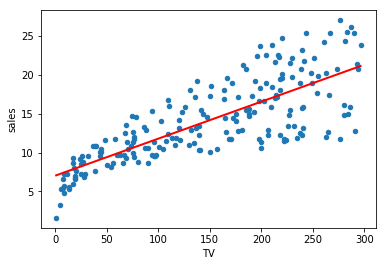

In [26]:
#frist, plot the observed data
data.plot(kind='scatter', x='TV', y='sales')

#then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

- pertama menampilkan figure data menggunakan model plot scatter dengan sumbu x = TV (data) dan sumbu y = sales
- kedua manampilkan garis berwarna merah yang bernilai prediksi dari nilai x_new sampai nilai prediksi (preds) dengan lebar 2